In [208]:
import pandas as pd
df_2023 = pd.read_csv("K:/data_science_week1/car_sales_2023.csv", index_col=0)
df_2024 = pd.read_csv("K:/data_science_week1/car_sales_2024.csv", index_col=0)
df_2025 = pd.read_csv("K:/data_science_week1/car_sales_2025.csv", index_col=0)

df = pd.concat([df_2023, df_2024 ,df_2025])


In [209]:
df = df.sort_values("date").reset_index(drop=True)
df.head()

,date,car_model,brand,units_sold,price,total_sales
0,2023-01-01,Creta,Hyundai,25.0,1200000.0,30000000.0
1,2023-01-02,Harrier,Tata,7.0,1700000.0,11900000.0
2,2023-01-02,XUV700,Mahindra,900.0,2000000.0,12000000.0
3,2023-01-06,Sonet,Kia,24.0,900000.0,21600000.0
4,2023-01-08,Venue,Hyundai,21.0,950000.0,19950000.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         500 non-null    object 
 1   car_model    500 non-null    object 
 2   brand        500 non-null    object 
 3   units_sold   483 non-null    float64
 4   price        473 non-null    float64
 5   total_sales  458 non-null    float64
dtypes: float64(3), object(3)
memory usage: 23.6+ KB


In [211]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         500 non-null    datetime64[ns]
 1   car_model    500 non-null    object        
 2   brand        500 non-null    object        
 3   units_sold   483 non-null    float64       
 4   price        473 non-null    float64       
 5   total_sales  458 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 23.6+ KB


In [213]:
df.isnull().sum()

date            0
car_model       0
brand           0
units_sold     17
price          27
total_sales    42
dtype: int64

In [214]:
df['year']=df["date"].dt.year

import numpy as np

df["units_sold"] = df.groupby(["year", "car_model"])["units_sold"] \
                     .transform(lambda x: x.fillna(np.floor(x.mean())))
df["price"] = df.groupby(["year", "car_model"])["price"]\
                 .transform(lambda x: x.fillna(x.mean()))



In [215]:
df.isnull().sum()

date            0
car_model       0
brand           0
units_sold      0
price           0
total_sales    42
year            0
dtype: int64

In [216]:
df["total_sales"] = df["total_sales"].fillna(df["units_sold"] * df["price"])

In [217]:
df.isnull().sum()

date           0
car_model      0
brand          0
units_sold     0
price          0
total_sales    0
year           0
dtype: int64

In [218]:
from scipy import stats

z_scores = stats.zscore(df["units_sold"])
outliers = df[(z_scores < -3) | (z_scores > 3)]  

print(f"Number of outliers in units_sold using Z-score : {outliers.shape[0]}")


Number of outliers in units_sold using Z-score : 2


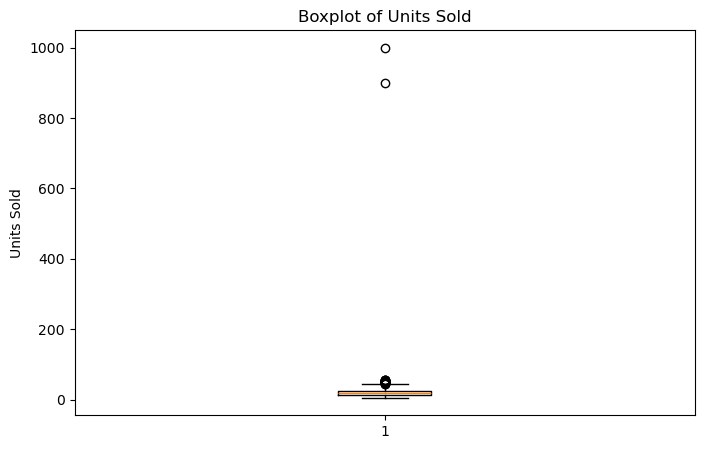

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df["units_sold"])
plt.title("Boxplot of Units Sold")
plt.ylabel("Units Sold")
plt.show()


In [220]:

#Here i have detected outliers in units sold . Now i am going to handle them using bounds . Here i will be taking 50 as the max units sold without these outliers is 44 .
df['units_sold'] = df['units_sold'].clip(lower=0, upper=60)

In [221]:
print("Maximum units sold:", df["units_sold"].max())

Maximum units sold: 60.0


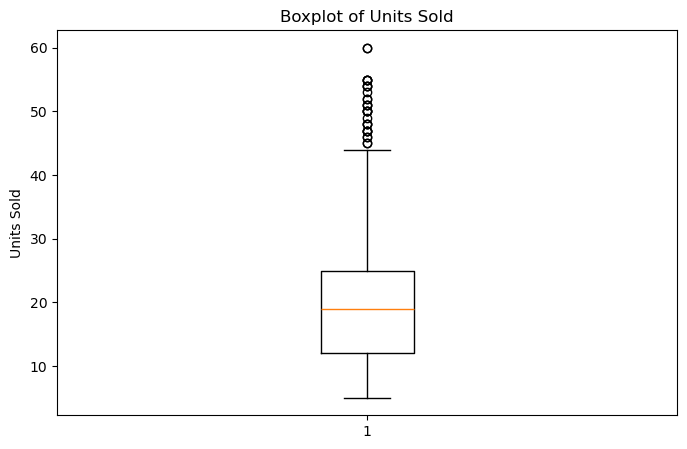

In [222]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df["units_sold"])
plt.title("Boxplot of Units Sold")
plt.ylabel("Units Sold")
plt.show()


In [223]:
df.to_csv("Cleaned_car_sales.csv")